<a href="https://colab.research.google.com/github/sriharshan136/Speech-Emotion-Recognition-CNN-LSTM/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Ravdess = "/content/drive/MyDrive/SER/Datasets/RAVDESS/audio_speech_actors_01-24/"
Tess = "/content/drive/MyDrive/SER/Datasets/TESS/"
Savee = "/content/drive/MyDrive/SER/Datasets/SAVEE/ALL/"
EmoDB = "/content/drive/MyDrive/SER/Datasets/Emo-DB/wav/"

1. RAVDESS (Ryerson Audio-Visual Database of Emotional Speech and Song) Dataset

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy',
                             4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'}, inplace=True)
print(Ravdess_df.Emotions.value_counts())
Ravdess_df.head()

neutral     288
fear        198
disgust     196
angry       192
sad         192
surprise    192
happy       192
Name: Emotions, dtype: int64


,Emotions,Path
0,angry,/content/drive/MyDrive/Mini Project/Datasets/R...
1,neutral,/content/drive/MyDrive/Mini Project/Datasets/R...
2,fear,/content/drive/MyDrive/Mini Project/Datasets/R...
3,fear,/content/drive/MyDrive/Mini Project/Datasets/R...
4,sad,/content/drive/MyDrive/Mini Project/Datasets/R...


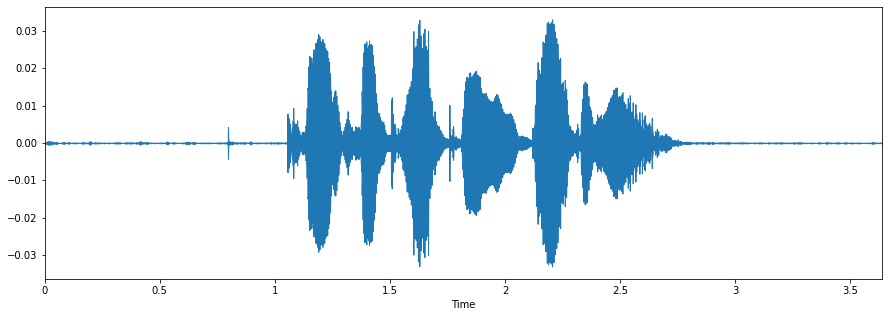

In [ ]:
#Ravdess
fname = Ravdess + 'Actor_08/03-01-01-01-01-02-08.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio
Audio(fname)

2. TESS dataset

In [ ]:
tess_directory_list = os.listdir(Tess)
file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
print(Tess_df.Emotions.value_counts())
Tess_df.head()

neutral     400
surprise    400
happy       400
fear        400
disgust     400
angry       400
sad         400
Name: Emotions, dtype: int64


,Emotions,Path
0,neutral,/content/drive/MyDrive/Mini Project/Datasets/T...
1,neutral,/content/drive/MyDrive/Mini Project/Datasets/T...
2,neutral,/content/drive/MyDrive/Mini Project/Datasets/T...
3,neutral,/content/drive/MyDrive/Mini Project/Datasets/T...
4,neutral,/content/drive/MyDrive/Mini Project/Datasets/T...


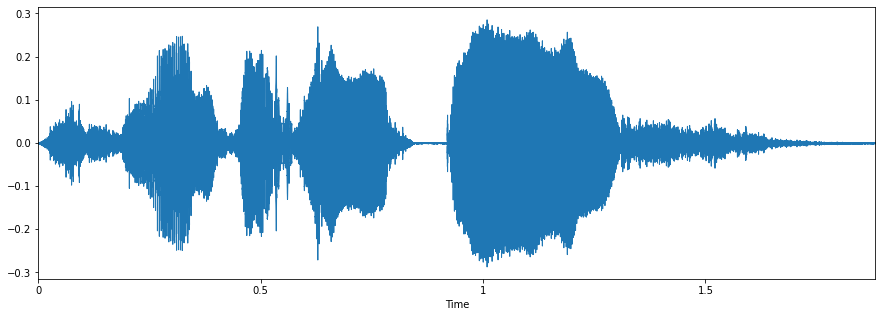

In [ ]:
#Tess
fname = Tess + 'YAF_fear/YAF_base_fear.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio
Audio(fname)

3. Savee dataset

In [ ]:
savee_directory_list = os.listdir(Savee)
file_emotion = []
file_path = []
for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
print(Savee_df.Emotions.value_counts())
Savee_df.head()

neutral     120
angry        60
happy        60
disgust      60
fear         60
sad          60
surprise     60
Name: Emotions, dtype: int64


,Emotions,Path
0,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
1,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
2,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
3,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
4,angry,/content/drive/MyDrive/Mini Project/Datasets/S...


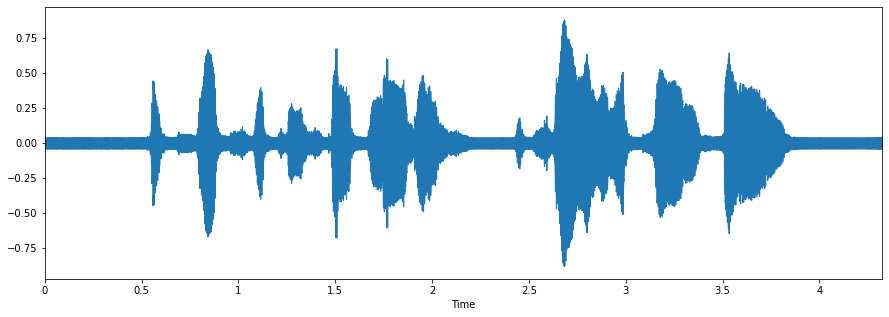

In [ ]:
#SAVEE
fname = Savee + 'DC_f11.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio
Audio(fname)

4. Emo DB dataset

In [ ]:
emodb_directory_list = os.listdir(EmoDB)
file_emotion = []
file_path = []
for file in emodb_directory_list:
    file_path.append(EmoDB + file)
    part=file[5]
    if part == 'T':
        file_emotion.append('sad')
    elif part == 'W':
        file_emotion.append('angry')
    elif part == 'E':
        file_emotion.append('disgust')
    elif part == 'A':
        file_emotion.append('fear')
    elif part == 'F':
        file_emotion.append('happy')
    elif part == 'L':
        file_emotion.append('neutral')
    elif part == 'N':
        file_emotion.append('surprise')
    else:
        file_emotion.append('Unknown')
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
EmoDB_df = pd.concat([emotion_df, path_df], axis=1)
print(EmoDB_df.Emotions.value_counts())
EmoDB_df.head()

angry       128
neutral      84
surprise     79
happy        73
fear         70
sad          64
disgust      47
Name: Emotions, dtype: int64


,Emotions,Path
0,happy,/content/drive/MyDrive/Mini Project/Datasets/E...
1,happy,/content/drive/MyDrive/Mini Project/Datasets/E...
2,surprise,/content/drive/MyDrive/Mini Project/Datasets/E...
3,angry,/content/drive/MyDrive/Mini Project/Datasets/E...
4,sad,/content/drive/MyDrive/Mini Project/Datasets/E...


In [ ]:
data_path = pd.concat([Savee_df, Tess_df, Ravdess_df, EmoDB_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
print(data_path.Emotions.value_counts())
print("Total no. of Audio files: ",len(data_path.Emotions))
data_path.head()

neutral     892
angry       780
surprise    731
fear        728
happy       725
sad         716
disgust     703
Name: Emotions, dtype: int64
Total no. of Audio files:  5275


,Emotions,Path
0,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
1,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
2,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
3,angry,/content/drive/MyDrive/Mini Project/Datasets/S...
4,angry,/content/drive/MyDrive/Mini Project/Datasets/S...


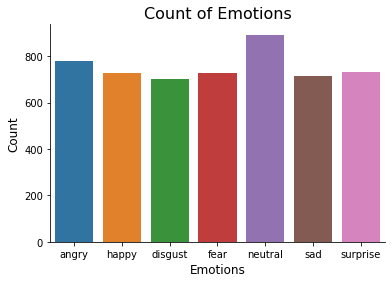

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [ ]:
def noise(data):
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

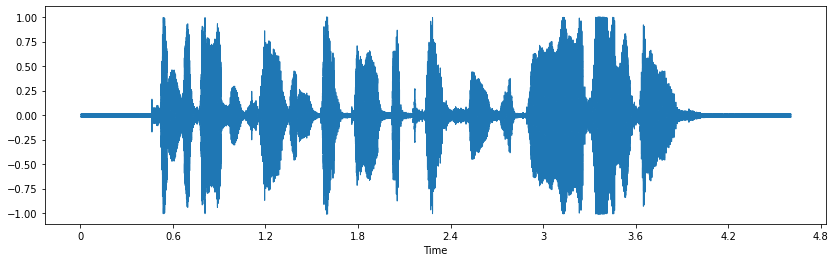

In [ ]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

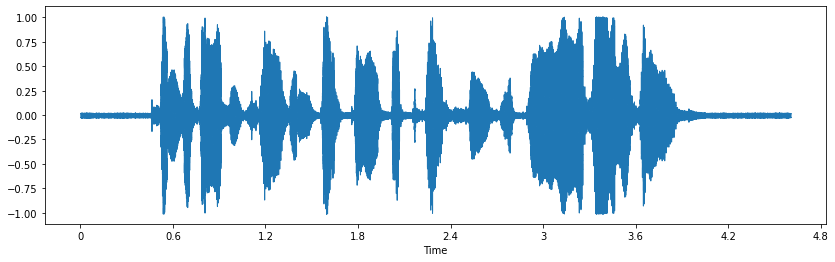

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

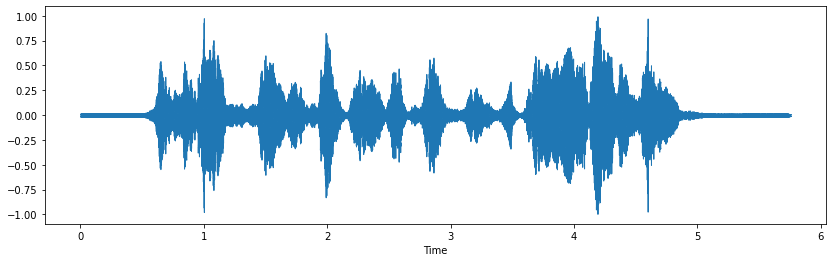

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

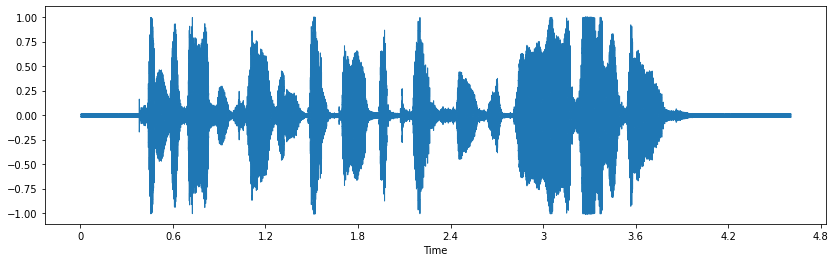

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

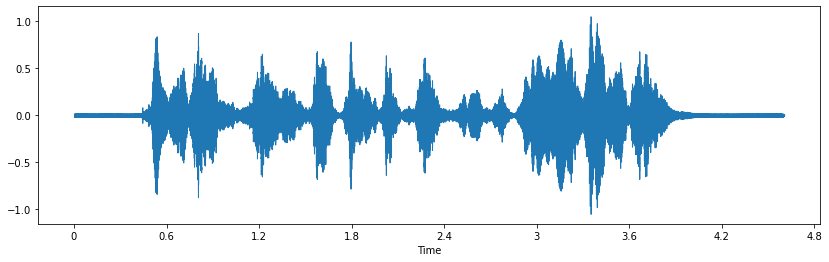

In [ ]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.feature.melspectrogram(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

def create_mfcc(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)
    plt.figure(figsize=(12,3))
    plt.title('Mel-frequency cepstral coefficient for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('MFCC')
    plt.colorbar()

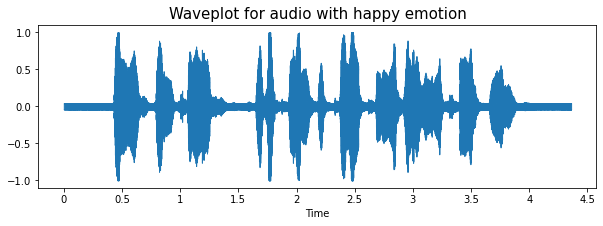

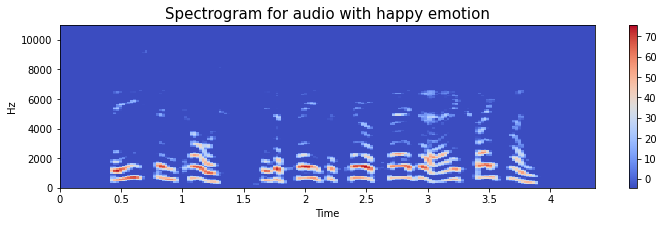

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
Audio(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

In [ ]:

def model2d(input_shape, num_classes):

    model = keras.Sequential(name='model2d')

    #LFLB1
    model.add(layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            input_shape=input_shape
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2))

    #LFLB2
    model.add(layers.Conv2D(filters=64,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    #LFLB3
    model.add(layers.Conv2D(filters=128,
                            kernel_size=3,
                            strides=1,
                            padding='same',
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    #LFLB4
    model.add(layers.Conv2D(filters=128,
                            kernel_size=3,
                            strides=1,
                            padding='same'
                            )
              )
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('elu'))
    model.add(layers.MaxPooling2D(pool_size=4, strides=4))

    model.add(layers.Reshape((-1, 128)))

    #LSTM
    model.add(layers.LSTM(32))

    model.add(layers.Dense(units=num_classes, activation='softmax'))

    model.summary()

    opt = keras.optimizers.Adam(learning_rate=0.0006, decay=1e-6)

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=['categorical_accuracy']
                  )

    return model

In [ ]:
def get_log_mel_spectrogram(y, sr, n_fft, hop_length, n_mels):

    file_length = np.size(y)
    if file_length != 128000:
        y = np.concatenate((y, np.zeros(128000-file_length)), axis=0)

    mel_spectrogram = librosa.feature.melspectrogram(y, sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram)
    log_mel_spectrogram = log_mel_spectrogram.reshape((-1,))

    return log_mel_spectrogram


def classify_files(data_path):

    dataset_dict = {
        'total': 0,
        'file_dict': {
            'neutral': {'represent': 0, 'count': 0, 'all_data': []},
            'fear': {'represent': 1, 'count': 0, 'all_data': []},
            'disgust': {'represent': 2, 'count': 0, 'all_data': []},
            'angry': {'represent': 3, 'count': 0, 'all_data': []},
            'sad': {'represent': 4, 'count': 0, 'all_data': []},
            'surprise': {'represent': 5, 'count': 0, 'all_data': []},
            'happy': {'represent': 6, 'count': 0, 'all_data': []}
        }
    }

    for path, emotion_label in zip(data_path.Path, data_path.Emotions):
      y, sr = librosa.load(path, sr=16000, duration=8)
      x = noise(y)
      dataset_dict['file_dict'][emotion_label]['count'] += 2
      dataset_dict['total'] += 2
      emotion_data = get_log_mel_spectrogram(y, sr, n_fft=2048, hop_length=512, n_mels=128)
      emotion_data_noise = get_log_mel_spectrogram(x, sr, n_fft=2048, hop_length=512, n_mels=128)
      dataset_dict['file_dict'][emotion_label]['all_data'].append(emotion_data)
      dataset_dict['file_dict'][emotion_label]['all_data'].append(emotion_data_noise)

    return dataset_dict


def load_data(path):
    """
    Returns:
        train_data_x, train_data_y:
            The emotion data and label of train data, which account for 80% in all.
        validation_data_x, validation_data_y:
            The emotion data and label of validation data, which account for 80% in train data.
        test_data_x, test_data_y:
            The emotion data and label of test data, which account for 20% in all.
    """
    train_data_x = []
    train_data_y = []
    validation_data_x = []
    validation_data_y = []
    test_data_x = []
    test_data_y = []

    dataset_dict = classify_files(path)

    '''Split data set'''
    emotion_label_list = dataset_dict['file_dict'].keys()
    for emotion_label in emotion_label_list:
        x = dataset_dict['file_dict'][emotion_label]['all_data']
        count = dataset_dict['file_dict'][emotion_label]['count']
        y = np.full(count, dataset_dict['file_dict'][emotion_label]['represent'])

        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

        x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8)

        train_data_x = np.append(train_data_x, x_train)
        train_data_y = np.append(train_data_y, y_train)

        validation_data_x = np.append(validation_data_x, x_val)
        validation_data_y = np.append(validation_data_y, y_val)

        test_data_x = np.append(test_data_x, x_test)
        test_data_y = np.append(test_data_y, y_test)

    '''Reshape all data'''
    train_data_x = np.array(train_data_x).reshape(-1, 128, 251, 1)
    train_data_y = np.array(train_data_y)
    validation_data_x = np.array(validation_data_x).reshape(-1, 128, 251, 1)
    validation_data_y = np.array(validation_data_y)
    test_data_x = np.array(test_data_x).reshape(-1, 128, 251, 1)
    test_data_y = np.array(test_data_y)

    return train_data_x, train_data_y, validation_data_x, validation_data_y, test_data_x, test_data_y

In [ ]:

# physical_device = tf.config.experimental.list_physical_devices("GPU")
# tf.config.experimental.set_memory_growth(physical_device[0], True)

def train(train_data_x, train_data_y, validation_data_x, validation_data_y):
    model = model2d(input_shape=(128, 251, 1), num_classes=7)
    model.summary()
    es = EarlyStopping(monitor='val_loss',
                       mode='min',
                       verbose=0,
                       patience=30)

    mc = ModelCheckpoint('model.h5',
                         monitor='val_categorical_accuracy',
                         mode='max',
                         verbose=0,
                         save_best_only=True)

    history = model.fit(train_data_x, train_data_y,
              validation_data=(validation_data_x, validation_data_y),
              epochs=100,
              batch_size=4,
              verbose=2,
              callbacks=[es, mc])
    return history


def test(test_data_x, test_data_y ):
    new_model = load_model('model.h5')
    new_model.evaluate(test_data_x, test_data_y, batch_size=1)


if __name__ == '__main__':

    train_data_x, train_data_y, validation_data_x, validation_data_y, test_data_x, test_data_y = load_data(data_path)

    train_data_x = normalize(train_data_x)
    validation_data_x = normalize(validation_data_x)
    test_data_x = normalize(test_data_x)

    train_data_y = to_categorical(train_data_y)
    validation_data_y = to_categorical(validation_data_y)
    test_data_y = to_categorical(test_data_y)

    history = train(train_data_x, train_data_y, validation_data_x, validation_data_y)

    test(test_data_x, test_data_y)

Model: "model2d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 251, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 251, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128, 251, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 125, 64)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 125, 64)       36928     
                                                                 
 batch_normalization_1 (Batc  (None, 64, 125, 64)      256 

In [ ]:
model = load_model('/content/drive/MyDrive/Speech Emotion Recognition/model_3.h5')
print("Accuracy of our model on test data : " , model.evaluate(test_data_x,test_data_y)[1]*100 , "%")

epochs = [i for i in range(61)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['categorical_accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_categorical_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

NameError: name 'test_data_x' is not defined

In [ ]:
pred_test = model.predict(test_data_x)
y_pred = np.argmax(pred_test, axis=1)
y_test = np.argmax(test_data_y, axis=1)

labels = ['neutral', 'fear', 'disgust', 'angry', 'sad', 'surprise', 'happy']
y_pred_labels = []
y_test_labels = []
for i in range(len(y_pred)):
  y_pred_labels.append(labels[y_pred[i]])
  y_test_labels.append(labels[y_test[i]])

In [ ]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred_labels
df['Actual Labels'] = y_test_labels

df.head(10)

,Predicted Labels,Actual Labels
0,neutral,neutral
1,neutral,neutral
2,neutral,neutral
3,sad,neutral
4,neutral,neutral
5,neutral,neutral
6,neutral,neutral
7,neutral,neutral
8,neutral,neutral
9,neutral,neutral


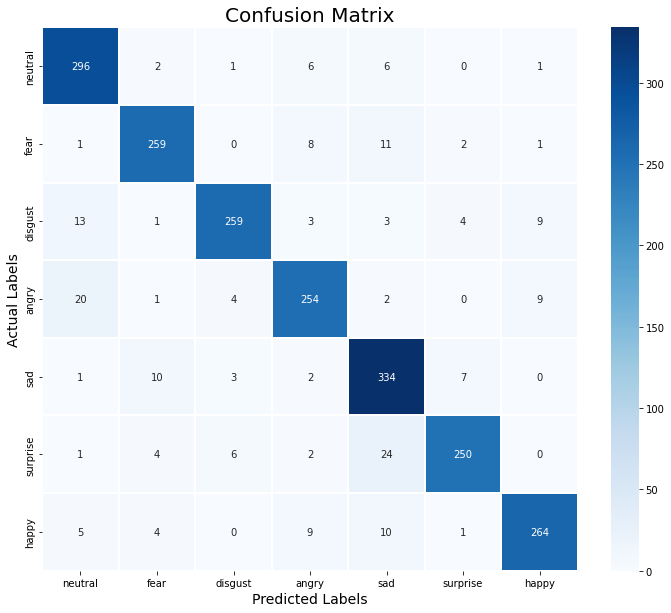

In [ ]:
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in labels] , columns = [i for i in labels])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [ ]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

       angry       0.88      0.95      0.91       312
     disgust       0.92      0.92      0.92       282
        fear       0.95      0.89      0.92       292
       happy       0.89      0.88      0.89       290
     neutral       0.86      0.94      0.89       357
         sad       0.95      0.87      0.91       287
    surprise       0.93      0.90      0.92       293

    accuracy                           0.91      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.91      0.91      0.91      2113



In [ ]:
n = 4895
audio = (train_data_x[n]).reshape(-1, 128, 251, 1)
new_model = load_model('model.h5')
model_pred = new_model.predict(audio)
classes_x = np.argmax(model_pred, axis=1)
classes_y = np.argmax(train_data_y[n])
print(classes_x)
print(classes_y)

[5]
5


In [ ]:
model_loc = "/content/drive/MyDrive/Speech Emotion Recognition/model_3.h5"
input_loc = "/content/drive/MyDrive/Speech Emotion Recognition/input_audio1.wav"

new_model = load_model(model_loc)
y, sr = librosa.load(input_loc, sr=16000, duration=8)
emotion_data = get_log_mel_spectrogram(y, sr, n_fft=2048, hop_length=512, n_mels=128)
audio = (emotion_data).reshape(-1, 128, 251, 1)
model_pred = new_model.predict(audio)
output = np.argmax(model_pred, axis=1)
labels = ['neutral', 'fear', 'disgust', 'angry', 'sad', 'surprise', 'happy']
print(labels[output[0]])

NameError: name 'get_log_mel_spectrogram' is not defined